In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('mental-health-survey/train.csv')
print(train.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees   ...     \
0             No       Yes          Often            6-25   ...      
1             No        No         Rarely  More than 1000   ...      
2             No        No         Rarely            6-25   ...      
3            Yes       Yes          Often          26-100   ...      
4             No        No          Never         100-500   ...      

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No      

In [3]:
print(train.shape)
print(train.columns)

(1259, 27)
Index([u'Timestamp', u'Age', u'Gender', u'Country', u'state', u'self_employed',
       u'family_history', u'treatment', u'work_interfere', u'no_employees',
       u'remote_work', u'tech_company', u'benefits', u'care_options',
       u'wellness_program', u'seek_help', u'anonymity', u'leave',
       u'mental_health_consequence', u'phys_health_consequence', u'coworkers',
       u'supervisor', u'mental_health_interview', u'phys_health_interview',
       u'mental_vs_physical', u'obs_consequence', u'comments'],
      dtype='object')


In [4]:
train.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [5]:
print(train.isnull().sum())

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [6]:
train = train.drop(['state','work_interfere','comments','Timestamp'],axis=1)
print(train.shape)

(1259, 23)


In [7]:
print(train.isnull().sum())

Age                           0
Gender                        0
Country                       0
self_employed                18
family_history                0
treatment                     0
no_employees                  0
remote_work                   0
tech_company                  0
benefits                      0
care_options                  0
wellness_program              0
seek_help                     0
anonymity                     0
leave                         0
mental_health_consequence     0
phys_health_consequence       0
coworkers                     0
supervisor                    0
mental_health_interview       0
phys_health_interview         0
mental_vs_physical            0
obs_consequence               0
dtype: int64


In [8]:
train = train.dropna(axis=0)
print(train.shape)
#print(train.isnull().sum())

(1241, 23)


In [9]:
#print(train.Gender.unique())
train["Gender_new"] = train["Gender"].apply(lambda x: 3 if "trans" in x.lower() or "queer" in x.lower() else 2 if "female" in x.lower() or "f" == x.lower() or "femail" in x.lower() or "femake" in x.lower() else 1 if "male" in x.lower() or "m" in x.lower() or "mail" in x.lower() or "msle" in x.lower() or "malr" in x.lower() or "man" in x.lower() else 3)
#print(train["Gender_new"].unique())

#print(train["Country"].unique())
train["Country_new"] = train["Country"].replace(['United States', 'France', 'United Kingdom', 'Canada', 'Portugal','Netherlands', 'Switzerland', 'Poland', 'Australia', 'Germany', 'Russia','Mexico', 'Brazil', 'Slovenia', 'Costa Rica', 'Austria', 'Ireland', 'India','South Africa', 'Italy', 'Bulgaria', 'Sweden', 'Colombia', 'Latvia', 'Romania','Belgium', 'New Zealand', 'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel','Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia','Norway', 'Thailand', 'Denmark', 'Bahamas, The', 'Greece', 'Moldova', 'Georgia','China', 'Czech Republic', 'Philippines'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
#print(train["Country_new"].unique())

#train["self_employed"].unique()
train["self_employed_new"] = train["self_employed"].replace(['Yes', 'No'],[1,2])
#print(train["self_employed_new"].unique())

#print(train["family_history"].unique())
train["family_history_new"] = train["family_history"].replace(['Yes', 'No'],[1,2])
#print(train["family_history_new"].unique())

#print(train["treatment"].unique())
train["treatment_new"] = train["treatment"].replace(['Yes', 'No'],[1,2])
#print(train["treatment_new"].unique())

#print(train["no_employees"].unique())
train["no_employees_new"] = train["no_employees"].replace(['1-5', '6-25', '100-500', '26-100', 'More than 1000', '500-1000'],[1,2,3,4,5,6])
#print(train["no_employees_new"].unique())

#print(train["remote_work"].unique())
train["remote_work_new"] = train["remote_work"].replace(['Yes', 'No'],[1,2])
#print(train["remote_work_new"].unique())

#print(train["tech_company"].unique())
train["tech_company_new"] = train["tech_company"].replace(['Yes', 'No'],[1,2])
#print(train["tech_company_new"].unique())

#print(train["benefits"].unique())
train["benefits_new"] = train["benefits"].replace(['Yes', 'No', "Don't know"],[1,2,2])
#print(train["benefits_new"].unique())

#print(train["care_options"].unique())
train["care_options_new"] = train["care_options"].replace(['Yes', 'No', "Not sure"],[1,2,2])
#print(train["care_options_new"].unique())

#print(train["wellness_program"].unique())
train["wellness_program_new"] = train["wellness_program"].replace(['Yes', 'No', "Don't know"],[1,2,2])
#print(train["wellness_program_new"].unique())

#print(train["seek_help"].unique())
train["seek_help_new"] = train["seek_help"].replace(['Yes', 'No', "Don't know"],[1,2,2])
#print(train["seek_help_new"].unique())

#print(train["anonymity"].unique())
train["anonymity_new"] = train["anonymity"].replace(['Yes', 'No', "Don't know"],[1,2,2])
#print(train["anonymity_new"].unique())

#print(train["leave"].unique())
train["leave_new"] = train["leave"].replace(['Very easy', 'Somewhat easy', "Somewhat difficult", "Don't know", "Very difficult"],[1,1,2,2,2])
#print(train["leave_new"].unique())

#print(train["mental_health_consequence"].unique())
train["mental_health_consequence_new"] = train["mental_health_consequence"].replace(['Yes', 'No', "Maybe"],[1,2,3])
#print(train["mental_health_consequence_new"].unique())

#print(train["phys_health_consequence"].unique())
train["phys_health_consequence_new"] = train["phys_health_consequence"].replace(['Yes', 'No', "Maybe"],[1,2,3])
#print(train["phys_health_consequence_new"].unique())

#print(train["coworkers"].unique())
train["coworkers_new"] = train["coworkers"].replace(['Yes', 'No', "Some of them"],[1,2,3])
#print(train["coworkers_new"].unique())

#print(train["supervisor"].unique())
train["supervisor_new"] = train["supervisor"].replace(['Yes', 'No', "Some of them"],[1,2,3])
#print(train["supervisor_new"].unique())

#print(train["mental_health_interview"].unique())
train["mental_health_interview_new"] = train["mental_health_interview"].replace(['Yes', 'No', "Maybe"],[1,2,2])
#print(train["mental_health_interview_new"].unique())

#print(train["phys_health_interview"].unique())
train["phys_health_interview_new"] = train["phys_health_interview"].replace(['Yes', 'No', "Maybe"],[1,2,2])
#print(train["phys_health_interview_new"].unique())

#print(train["mental_vs_physical"].unique())
train["mental_vs_physical_new"] = train["mental_vs_physical"].replace(['Yes', 'No', "Don't know"],[1,2,2])
#print(train["mental_vs_physical_new"].unique())

#print(train["obs_consequence"].unique())
train["obs_consequence_new"] = train["obs_consequence"].replace(['Yes', 'No'],[1,2])
#print(train["obs_consequence_new"].unique())

In [10]:
new_train = train[['obs_consequence_new','mental_vs_physical_new','phys_health_interview_new','mental_health_interview_new','supervisor_new','coworkers_new','phys_health_consequence_new','mental_health_consequence_new','leave_new','anonymity_new','seek_help_new','wellness_program_new','care_options_new','benefits_new','tech_company_new','remote_work_new','no_employees_new','treatment_new','family_history_new','self_employed_new','Country_new','Gender_new']]
#print(new_train.shape)
#print(new_train.head())

In [11]:
label = new_train['treatment_new']
original = new_train
print(label.shape)
new_train = new_train.drop(['treatment_new'],axis=1)
print(new_train.shape)

(1241,)
(1241, 21)


In [12]:
data_n_3 = (new_train - new_train.mean()) / (new_train.std())
#print(data_n_3.head())

In [13]:
data_n_4 = data_n_3.iloc[:,0:10]
#print(data_n_4.head())

In [14]:
data_n_5 = pd.concat([label,data_n_3.iloc[:,0:10]],axis=1)
#print(data_n_5.head())

In [15]:
print(data_n_5.shape)

(1241, 11)


In [16]:
data_dia = label
#standardise
data_n_2 = (new_train - new_train.mean()) / (new_train.std())  
data = pd.concat([label,data_n_2.iloc[:,0:10]],axis=1)
#print(data.head())

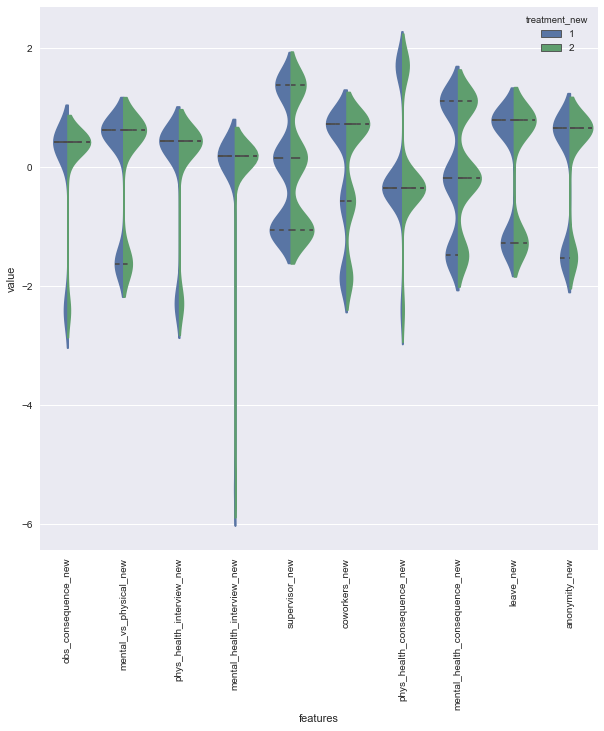

In [17]:
data = pd.melt(data,id_vars="treatment_new",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="treatment_new", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

In [18]:
data = pd.concat([label,data_n_2.iloc[:,11:21]],axis=1)
#print(data.head())

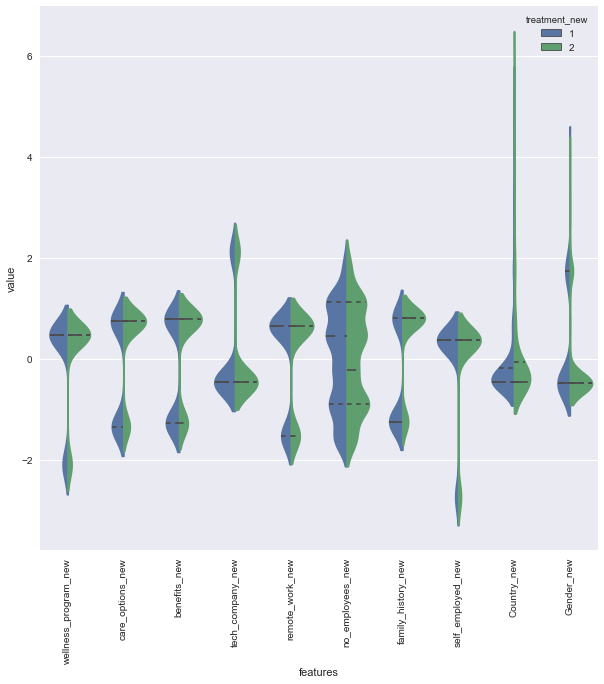

In [19]:
data = pd.melt(data,id_vars="treatment_new",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="treatment_new", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

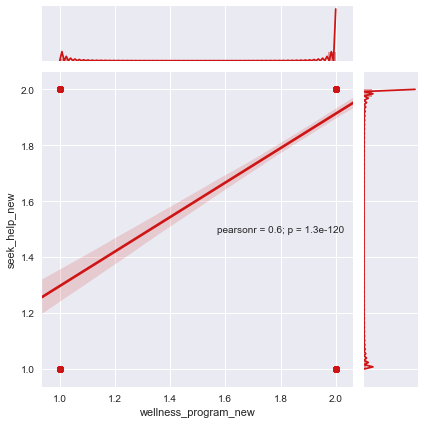

In [20]:
sns.jointplot(new_train.loc[:,'wellness_program_new'], new_train.loc[:,'seek_help_new'], kind="regg", color="#ce1414")
plt.show()

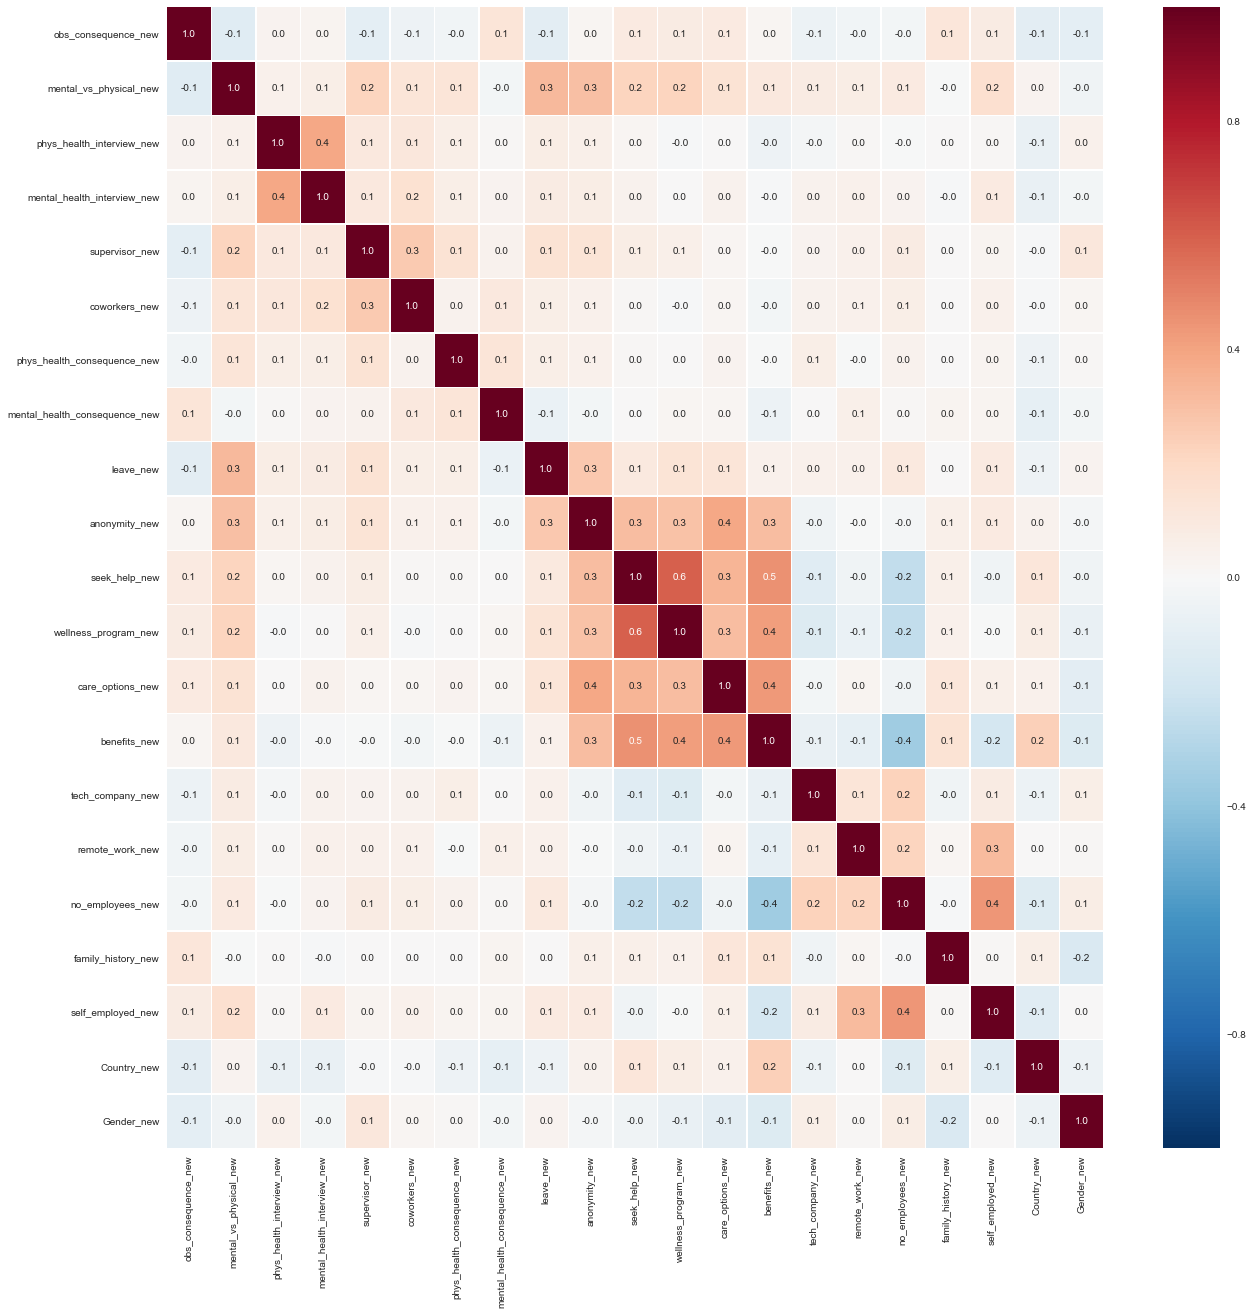

In [21]:
#correlation map
f,ax = plt.subplots(figsize=(21, 21))
sns.heatmap(new_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

('Accuracy is: ', 0.65415549597855227)


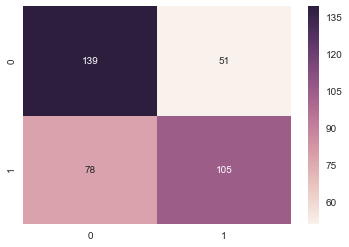

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(new_train, label, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

('Score list:', array([  1.19450655e+00,   5.25886344e-02,   5.94521835e-02,
         1.32968300e-02,   2.27344982e-01,   9.79364033e-01,
         1.67076725e-04,   1.97032317e-01,   6.49116202e-03,
         1.17167767e+00,   5.16292713e-01,   5.91117055e-01,
         8.00858431e+00,   5.85517843e+00,   1.59486499e-01,
         2.87946799e-01,   9.17147211e-02,   2.02487691e+01,
         4.03601676e-02,   1.60455297e+02,   7.46467986e+00]))
('Feature list:', Index([u'obs_consequence_new', u'mental_vs_physical_new',
       u'phys_health_interview_new', u'mental_health_interview_new',
       u'supervisor_new', u'coworkers_new', u'phys_health_consequence_new',
       u'mental_health_consequence_new', u'leave_new', u'anonymity_new',
       u'seek_help_new', u'wellness_program_new', u'care_options_new',
       u'benefits_new', u'tech_company_new', u'remote_work_new',
       u'no_employees_new', u'family_history_new', u'self_employed_new',
       u'Country_new', u'Gender_new'],
      dtype='

('Accuracy is: ', 0.67560321715817695)


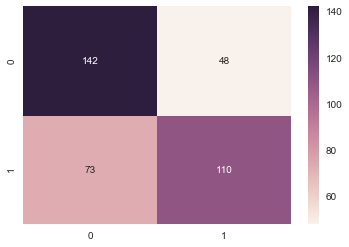

In [24]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")
plt.show()

In [25]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

('Chosen best 5 feature by rfe:', Index([u'supervisor_new', u'mental_health_consequence_new',
       u'no_employees_new', u'family_history_new', u'Country_new'],
      dtype='object'))


In [26]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

('Optimal number of features :', 20)
('Best features :', Index([u'obs_consequence_new', u'mental_vs_physical_new',
       u'phys_health_interview_new', u'supervisor_new', u'coworkers_new',
       u'phys_health_consequence_new', u'mental_health_consequence_new',
       u'leave_new', u'anonymity_new', u'seek_help_new',
       u'wellness_program_new', u'care_options_new', u'benefits_new',
       u'tech_company_new', u'remote_work_new', u'no_employees_new',
       u'family_history_new', u'self_employed_new', u'Country_new',
       u'Gender_new'],
      dtype='object'))


Feature ranking:
1. feature 17 (0.128373)
2. feature 16 (0.117193)
3. feature 19 (0.101604)
4. feature 4 (0.064271)
5. feature 7 (0.061012)
6. feature 12 (0.058062)
7. feature 5 (0.049964)
8. feature 8 (0.042342)
9. feature 20 (0.040754)
10. feature 6 (0.040682)
11. feature 13 (0.038254)
12. feature 1 (0.032416)
13. feature 14 (0.031483)
14. feature 9 (0.031458)
15. feature 15 (0.031364)
16. feature 0 (0.030630)
17. feature 2 (0.028105)
18. feature 11 (0.023558)
19. feature 10 (0.023519)
20. feature 18 (0.019596)
21. feature 3 (0.005361)


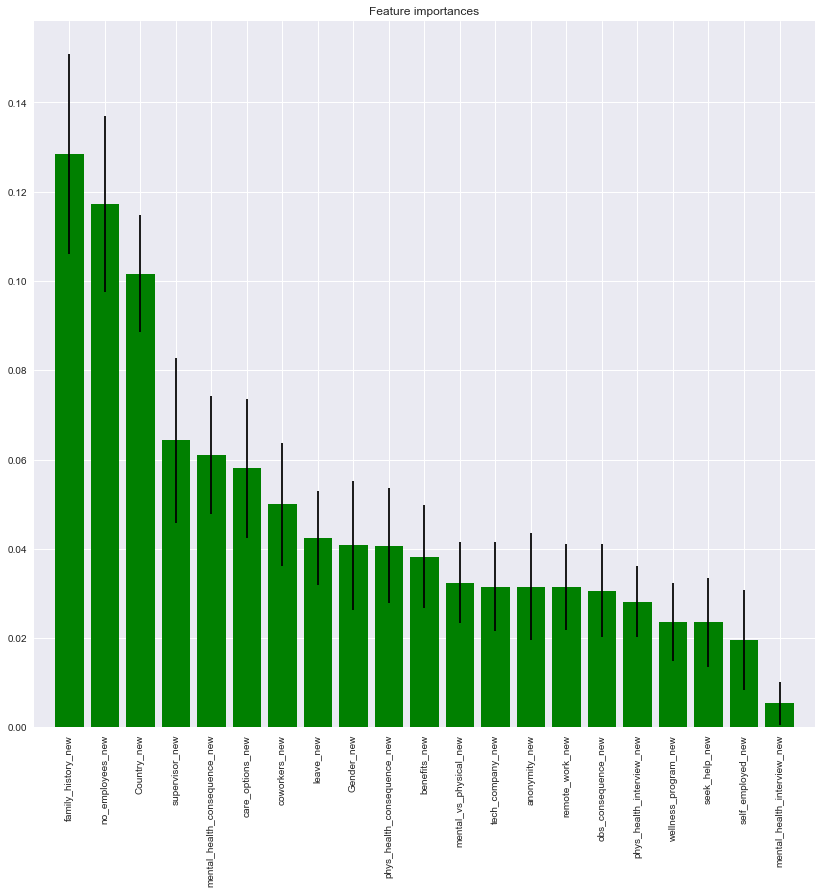

In [27]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

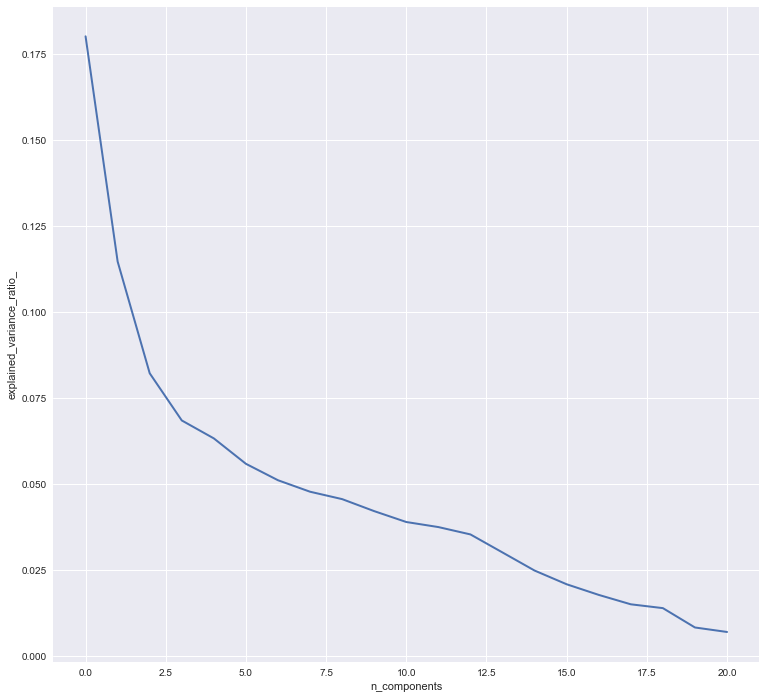

In [29]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(new_train, label, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.show()